# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/mission_hospital_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           240 non-null    float64
 1   GENDER                        240 non-null    object 
 2   MARITAL STATUS                240 non-null    object 
 3   KEY COMPLAINTS-CODE           240 non-null    object 
 4   BODY WEIGHT                   240 non-null    float64
 5   BODY HEIGHT                   240 non-null    int64  
 6   HR PULSE                      240 non-null    int64  
 7   BP-HIGH                       240 non-null    float64
 8   BP-LOW                        240 non-null    float64
 9   RR                            240 non-null    int64  
 10  PAST MEDICAL HISTORY CODE     240 non-null    object 
 11  HB                            240 non-null    float64
 12  UREA                          240 non-null    float64
 13  CREAT

In [4]:
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS-CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP-HIGH,BP-LOW,RR,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY-ICU,LENGTH OF STAY-WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,...,0.8,AMBULANCE,ALERT,EMERGENCY,660293.0,25,12,13,Y,38000
1,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,...,1.7,AMBULANCE,ALERT,EMERGENCY,809130.0,41,20,21,Y,39690
2,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,...,0.8,WALKED IN,ALERT,ELECTIVE,362231.0,18,9,9,N,0
3,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,...,1.5,AMBULANCE,ALERT,EMERGENCY,629990.0,14,13,1,Y,89450
4,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,...,1.9,AMBULANCE,ALERT,EMERGENCY,444876.0,24,12,12,N,0


In [5]:
#Body Height and Weight alone my not be useful so body mass index (BMI) is a better indicator of health
df['BMI']=df['BODY WEIGHT']/((df['BODY HEIGHT']/100)**2)
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS-CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP-HIGH,BP-LOW,RR,...,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY-ICU,LENGTH OF STAY-WARD,IMPLANT USED (Y/N),COST OF IMPLANT,BMI
0,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,...,AMBULANCE,ALERT,EMERGENCY,660293.0,25,12,13,Y,38000,19.218750
1,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,...,AMBULANCE,ALERT,EMERGENCY,809130.0,41,20,21,Y,39690,17.065557
2,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,...,WALKED IN,ALERT,ELECTIVE,362231.0,18,9,9,N,0,17.325996
3,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,...,AMBULANCE,ALERT,EMERGENCY,629990.0,14,13,1,Y,89450,26.729927
4,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,...,AMBULANCE,ALERT,EMERGENCY,444876.0,24,12,12,N,0,18.938776


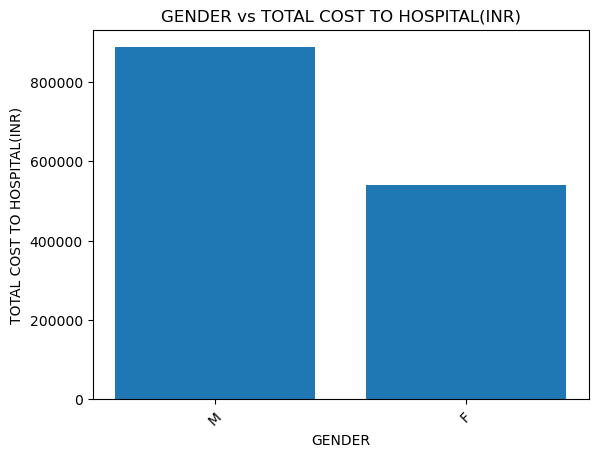

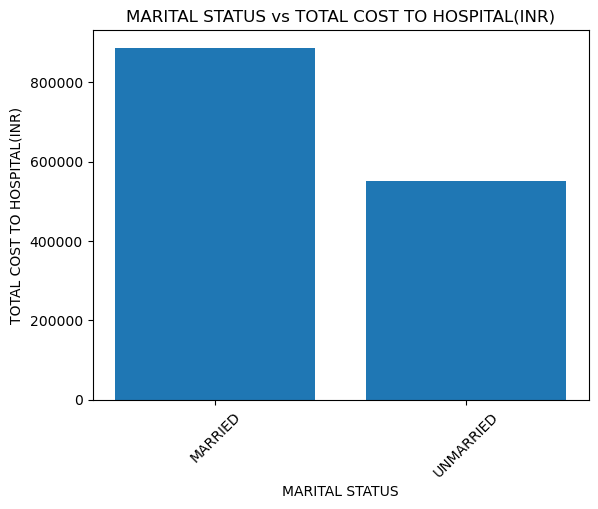

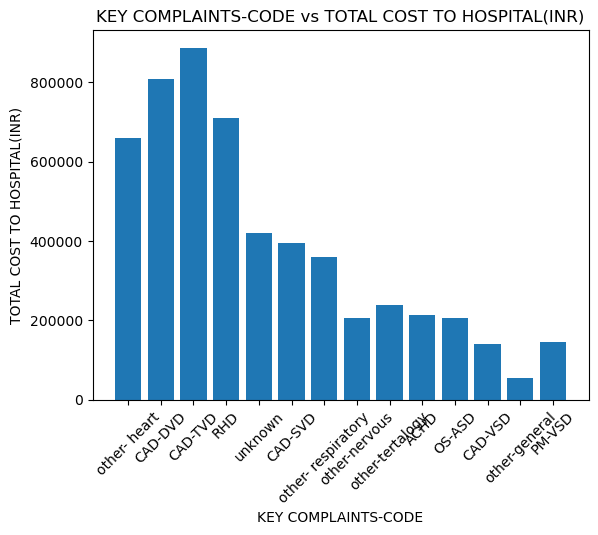

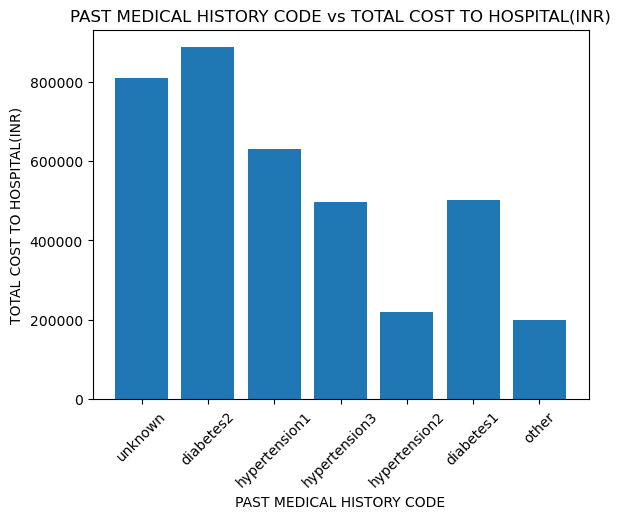

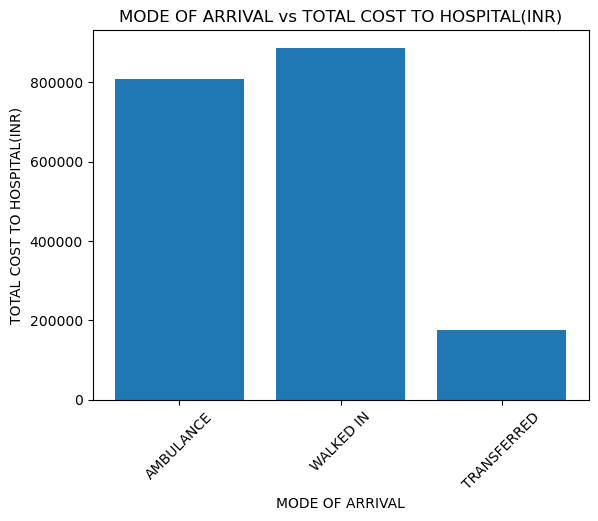

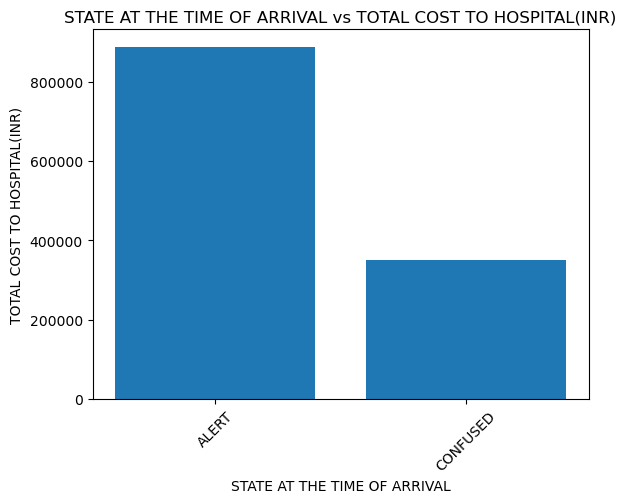

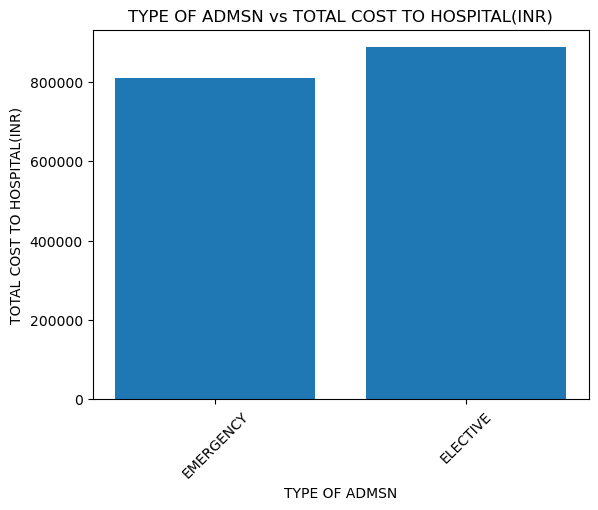

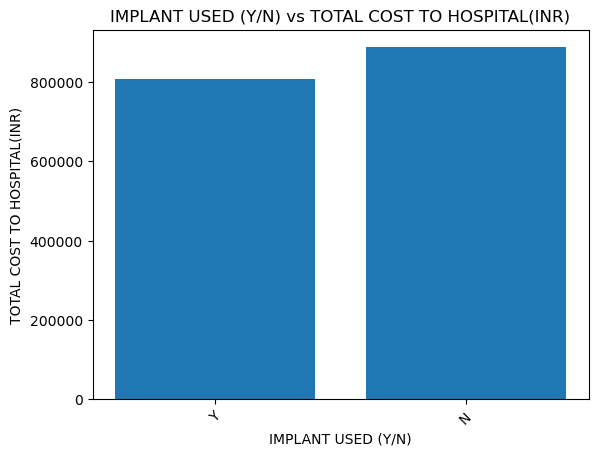

In [6]:
#We observe our categorigal variable relationships to our dependent variable
for col in df.columns:
    if df[col].dtype == 'object':
        plt.bar(x=df[col], height=df['TOTAL COST TO HOSPITAL'])
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('TOTAL COST TO HOSPITAL(INR)' )
        plt.title(f'{col} vs TOTAL COST TO HOSPITAL(INR)')
        plt.show()

From our bar graphs we see that female patients has lower total cost compared to male patients. We also see that married couples have more total cost than unnmarried couples. CAD-TVD (Coronary Artery Disease - Triple Vessel Disease) has the highest total cost followed by CAD-DVD (Coronary Artery Disease - Double Vessel Disease). Patients with the past history of diabetes2 has the highest total cost. Surprisingly, walk-in patients has higher total cost than patients arriving by Ambulance. Also suprisingly, patients that appeared alert at arrival has much higher total cost than patients appearing confused at arrival. type of admissions and whether implant was used show small variablility with patients with elective admssion and with no implant showing slightly higher cost. overall all the categorical variable seems to show some variations; therefore we're going to keep all the categorical variables.   

In [7]:
#We cannot really differentiate between other-general and unknown KEY COMPLAINTS-CODE we put them under one category
df['KEY COMPLAINTS-CODE'] = df['KEY COMPLAINTS-CODE'].str.replace('unknown', 'other-general')
df['KEY COMPLAINTS-CODE'].unique()

array(['other- heart', 'CAD-DVD', 'CAD-TVD', 'RHD', 'other-general',
       'CAD-SVD', 'other- respiratory', 'other-nervous',
       'other-tertalogy', 'ACHD', 'OS-ASD', 'CAD-VSD', 'PM-VSD'],
      dtype=object)

We don't do the same for past medical history because we interprate other as has having other past medical history but unknown as uknown whether that patient as past medical history or not

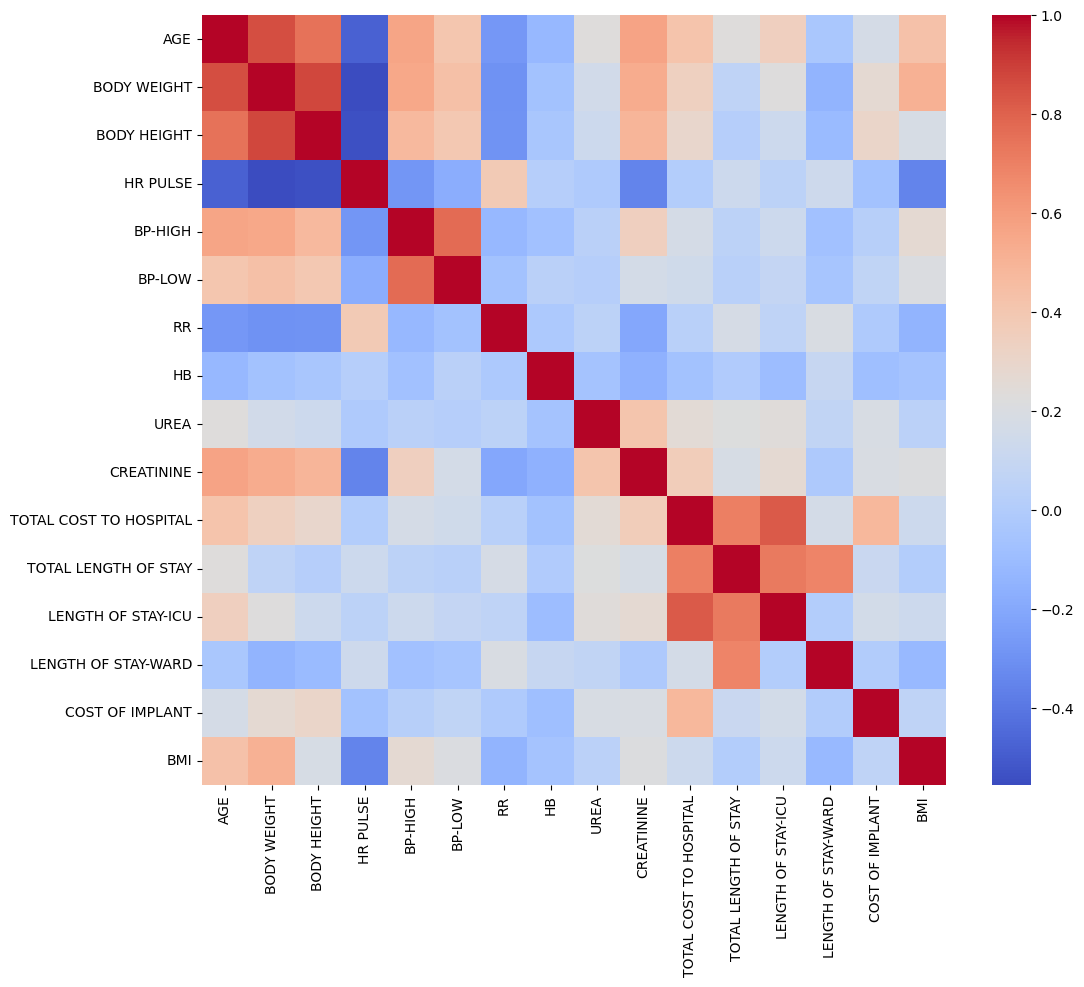

In [8]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='coolwarm');

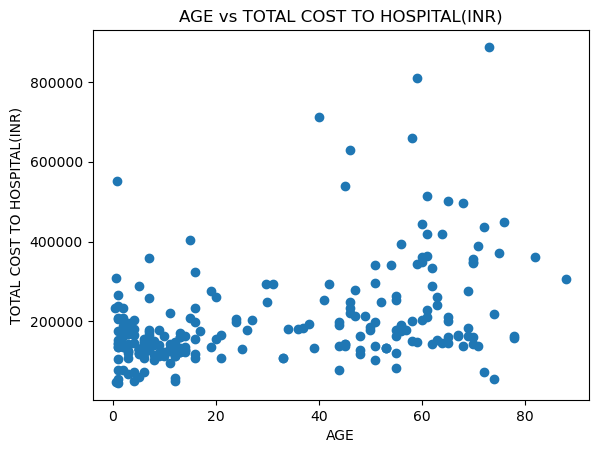

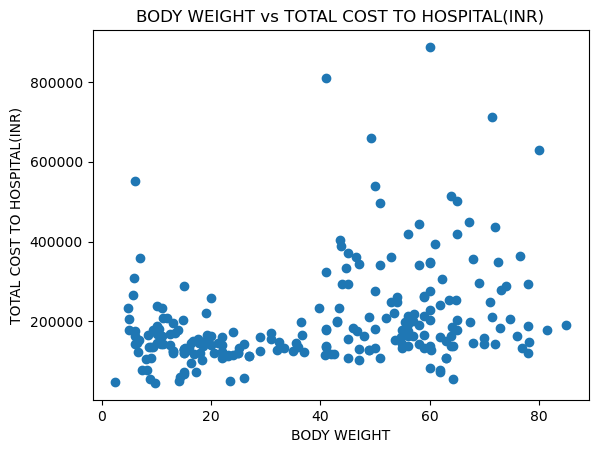

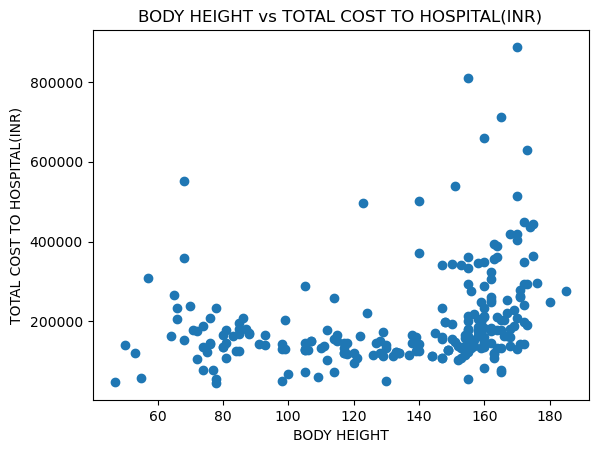

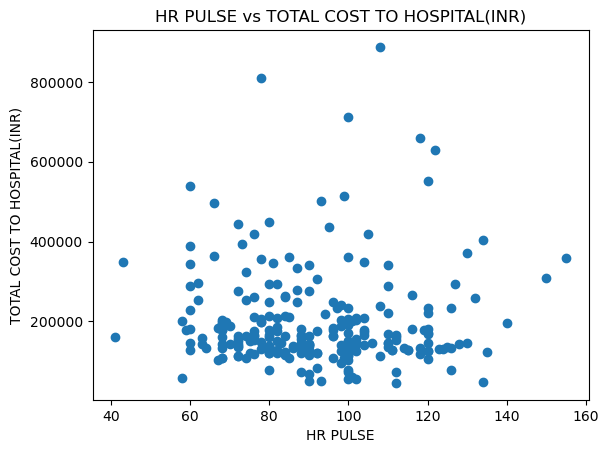

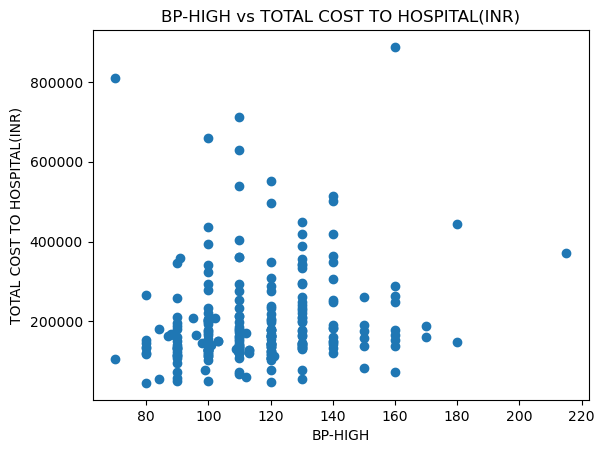

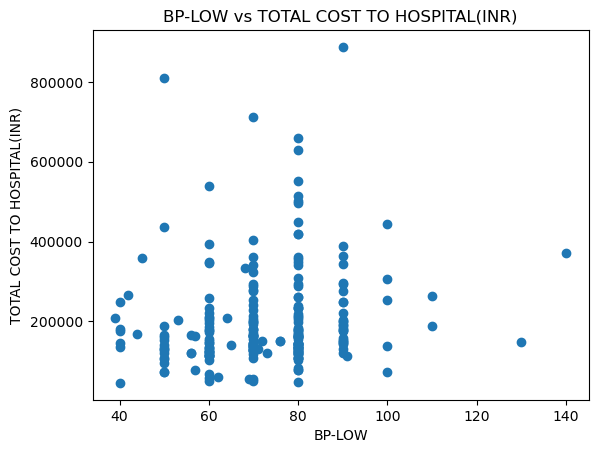

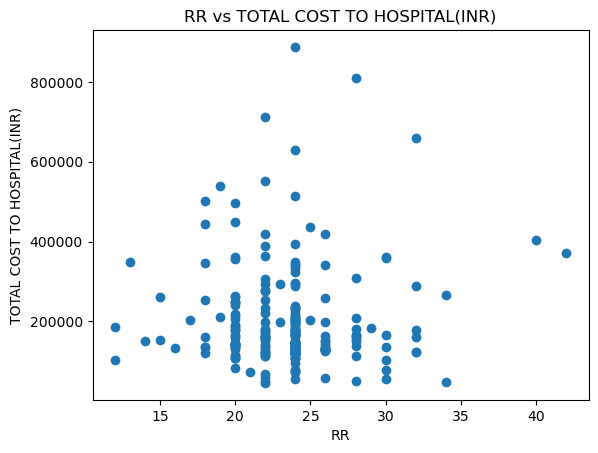

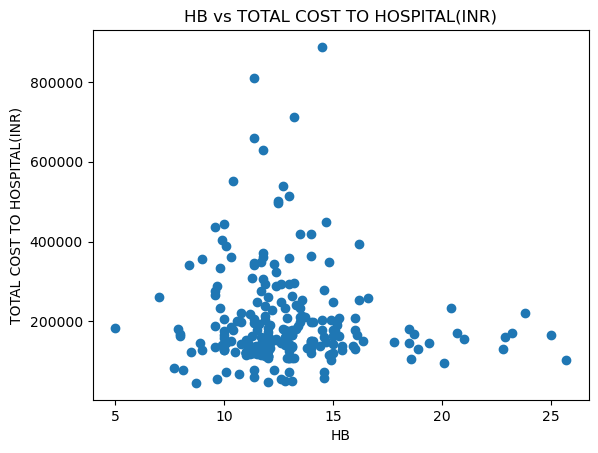

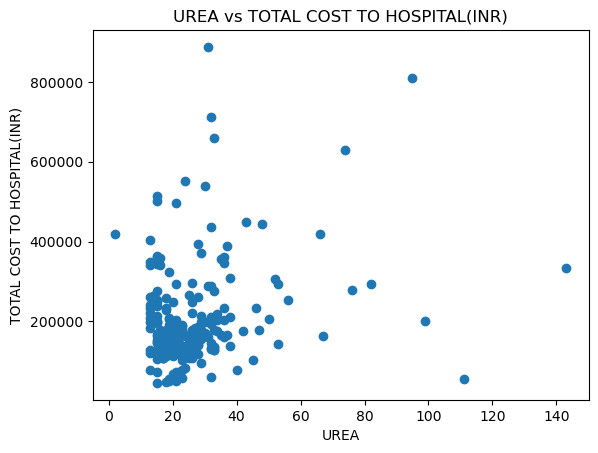

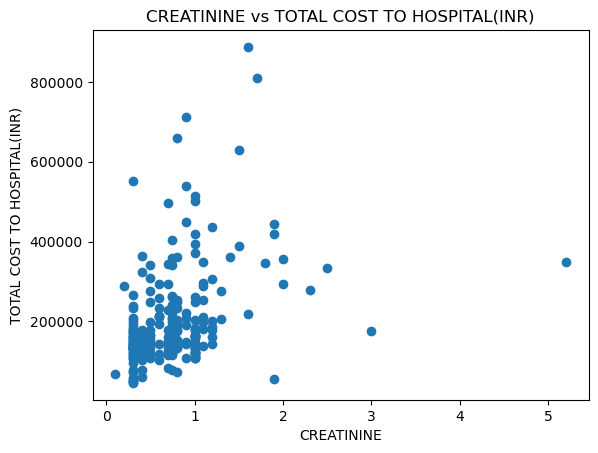

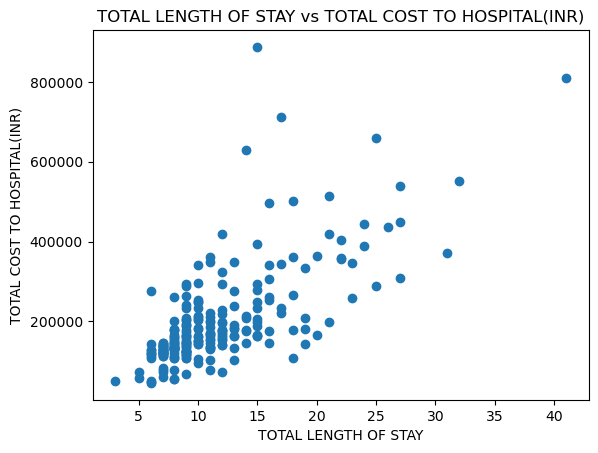

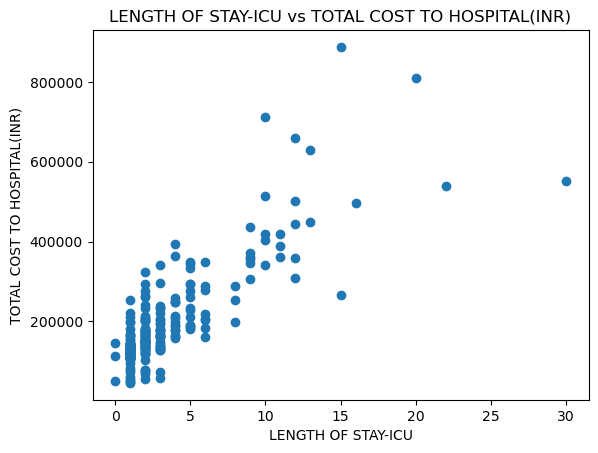

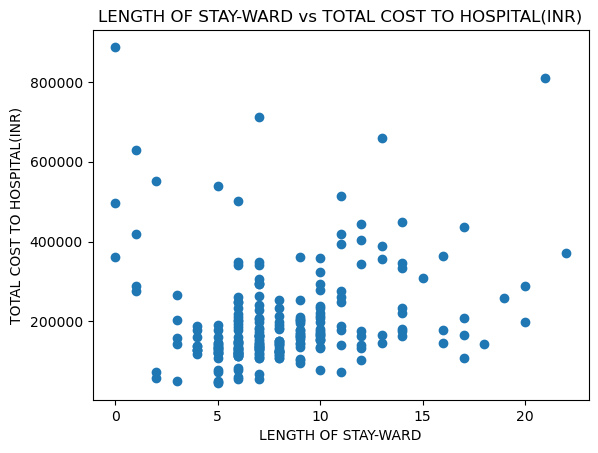

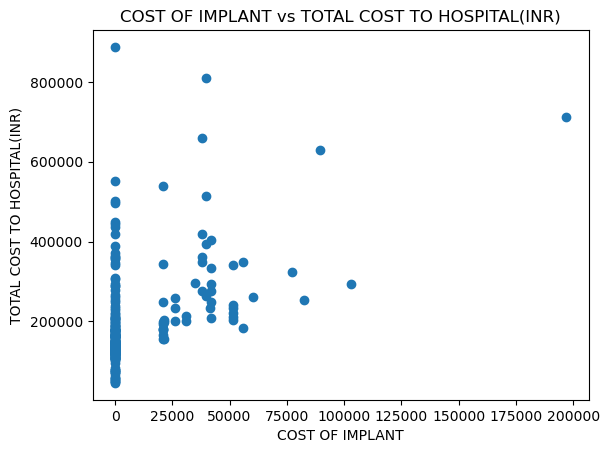

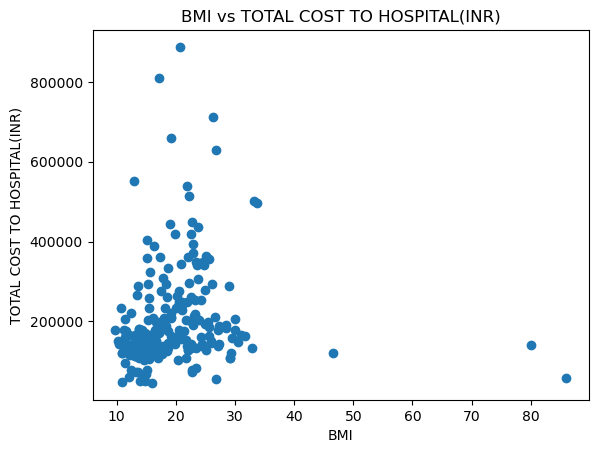

In [9]:
for col in df.columns:
    if df[col].dtype != 'object' and col != 'TOTAL COST TO HOSPITAL':
        plt.scatter(x=df[col], y=df['TOTAL COST TO HOSPITAL'])
        
        plt.xlabel(col)
        plt.ylabel('TOTAL COST TO HOSPITAL(INR)' )
        plt.title(f'{col} vs TOTAL COST TO HOSPITAL(INR)')
        plt.show()

In [10]:
print(df[df['BMI']> 50])

      AGE GENDER MARITAL STATUS KEY COMPLAINTS-CODE  BODY WEIGHT  BODY HEIGHT  \
159   9.0      F      UNMARRIED              OS-ASD         20.0           50   
196  12.0      F      UNMARRIED        other- heart         26.0           55   

     HR PULSE  BP-HIGH  BP-LOW  RR  ... MODE OF ARRIVAL  \
159        90    110.0    65.0  24  ...       WALKED IN   
196        58     90.0    60.0  26  ...       WALKED IN   

     STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN  TOTAL COST TO HOSPITAL  \
159                         ALERT       ELECTIVE               141232.17   
196                         ALERT       ELECTIVE                58943.00   

    TOTAL LENGTH OF STAY LENGTH OF STAY-ICU LENGTH OF STAY-WARD  \
159                   12                  1                  12   
196                    5                  3                   2   

     IMPLANT USED (Y/N)  COST OF IMPLANT        BMI  
159                   N                0  80.000000  
196                   N                